<div align=center style="line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<h1>
یونیدرو
</h1>
</p>
</div>


<h2 align=right style="direction: rtl; text-align: right; line-height:200%;font-family:vazir;color:#0099cc">
آشنایی با نقشه‌ی حرارتی (heatmap) 
</h2>
<div style="line-height:200%;font-family:vazir;font-size:medium">
<p style="direction: rtl;text-align: justify;">
نقشه‌ی حرارتی روشی برای نمایش داده‌ها در امور تحلیل داده‌ای می‌باشد که در آن رنگ‌ها متناسب با بزرگی و کوچکی اعداد تغییر می‌کنند. در نقشه‌های حرارتی، از یک تابع نگاشت رنگ (color map) برای تبدیل اعداد به رنگ‌ها استفاده می‌شود. نقشه‌ی حرارتی کاربرد‌های بسیاری دارد و در حوزه‌های مختلفی می‌توان برای نمایش اطلاعات از آن استفاده کرد. محققان داده معمولاً هنگامی‌که می‌خواهند نتایج کار را به شکلی قابل فهم به افراد غیر‌متخصص نشان دهند از نقشه‌ی حرارتی استفاده می‌کند. فرض کنید یک مجموعه‌داده بزرگ دارید و رابطه‌ی همه‌ی ستون‌ها را با هم به‌صورت یک‌به‌یک محاسبه کرده‌اید. اگر بخواهید نتایج به‌دست‌آمده را به فرد دیگری نشان دهید، ارائه‌ی همه‌ی اعداد راه‌‌حل ساده‌ای نمی‌باشد. به جای آن، می‌توان یک نقشه‌ی حرارتی ایجاد کرد که با یک نگاه به آن، خیلی سریع متغیر‌های به هم وابسته شناسایی می‌شوند چون رنگ آنها متفاوت است. در این تمرین با استفاده از نقشه‌ی حرارتی رابطه بین عناصر مختلف در این مجموعه‌داده را مشخص می‌کنیم.
</p>
</div>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


<h2 align=right style="direction: rtl; text-align: right; line-height:200%;font-family:vazir;color:#0099cc">
مجموعه‌داده
</h2>



<div style="line-height:200%;font-family:vazir;font-size:medium">
<p style="direction: rtl;text-align: justify;">
نگاهی به دیتافریم بیندازیم:</p>
</div>

In [2]:
df = pd.read_csv('unidro_data.csv')
df.head()

,Au8,Au8_CN,Au,Ag,Al,As,B,Ba,Ca,Ce,...,P,Pb,S,Sb,Sr,Th,Ti,V,Y,Zn
0,0.67,32.40,2.068,1.7,5300,649,12,205,300,97,...,900,1227,27600,592,16,22,18,10,21,388
1,0.08,8.82,0.907,0.8,6900,451,13,345,400,103,...,1180,251,17600,237,20,22,19,9,18,567
2,0.04,6.80,0.588,0.9,6900,1007,17,210,400,98,...,990,121,17700,317,18,22,22,10,17,552
3,0.55,7.00,7.855,1.1,10600,19627,13,140,500,94,...,1240,158,37300,1454,25,24,22,18,21,5965
4,0.15,20.60,0.728,21.3,7900,5776,14,123,1800,75,...,1430,17270,69700,582,28,19,20,10,20,1394



<div style="line-height:200%;font-family:vazir;font-size:medium">
<p style="direction: rtl;text-align: justify;">
دیتافریم این تمرین، از اطلاعات واقعی عناصر و عیار آن‌ها که شرکت یونیدرو از آن‌ها استفاده می‌کند، به‌ دست‌ آمده است. در صنایع معدن، نمونه‌های یک گرمی را با دستگاهی به نام <i>ICP-OES</i>
 مورد بررسی قرار می‌دهند و دستگاه، غلظت عناصر موجود در آن نمونه‌ی یک گرمی را به ما می‌دهد. واحد غلظت، ppm (part per million) می‌باشد. در این دیتافریم، ۱۲۲۶ نمونه‌ی یک گرمی مورد بررسی قرار گرفته‌اند و غلظت عناصر مورد نظر ما (۳۱ عنصر)، به‌ دست‌ آمده‌اند. در این تمرین، می‌خواهیم بررسی کنیم که آیا رابطه‌ی معناداری بین عیار عناصر وجود دارد یا خیر. یعنی با افزایش یک عنصر در یک نمونه، چه عناصری کاهش یا افزایش می‌یابند.
</p>
</div>

In [3]:
df.shape

(1226, 31)


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
بخش اول
</h2>
<div style="line-height:200%;font-family:vazir;font-size:medium">
<p style="direction: rtl;text-align: justify;">
ماتریس ارتباط (correlation)  بین ستون‌های این دیتافریم را به دست آورید.
</p>
</div>




In [4]:
corr_matrix = df.corr()
corr_matrix

,Au8,Au8_CN,Au,Ag,Al,As,B,Ba,Ca,Ce,...,P,Pb,S,Sb,Sr,Th,Ti,V,Y,Zn
Au8,1.000000,0.295985,0.862428,0.086993,-0.038212,-0.022517,-0.065709,0.008831,-0.048206,0.027005,...,-0.016155,0.037160,-0.039872,0.029872,0.080678,-0.074293,-0.004118,0.054925,-0.012589,-0.005504
Au8_CN,0.295985,1.000000,0.128600,0.137364,0.054848,-0.101090,-0.035020,0.214636,-0.234587,-0.028041,...,-0.112604,0.125213,-0.186352,0.015509,0.358980,-0.086310,0.044347,0.120635,-0.001567,-0.049843
Au,0.862428,0.128600,1.000000,0.066124,-0.053453,0.066559,-0.108602,-0.080027,-0.051858,0.007717,...,-0.027793,0.022451,0.024826,0.073369,0.059690,-0.130668,-0.026123,0.091624,-0.000417,0.008842
Ag,0.086993,0.137364,0.066124,1.000000,-0.041020,0.044027,-0.047508,-0.052796,-0.052954,-0.107657,...,0.039334,0.714064,0.191606,0.092371,-0.019500,-0.122829,-0.027780,-0.025457,-0.057610,0.111281
Al,-0.038212,0.054848,-0.053453,-0.041020,1.000000,0.059256,0.189981,0.159632,-0.121744,0.188501,...,0.208023,0.000084,-0.001248,0.000143,0.376685,0.099997,0.274392,0.406001,0.539091,0.273847
As,-0.022517,-0.101090,0.066559,0.044027,0.059256,1.000000,-0.038941,-0.202814,-0.085501,-0.182963,...,-0.128783,0.057398,0.510021,0.275573,0.016564,-0.291940,-0.058901,-0.024825,-0.025480,0.098589
B,-0.065709,-0.035020,-0.108602,-0.047508,0.189981,-0.038941,1.000000,0.070111,0.158857,-0.004182,...,-0.020846,-0.107926,0.059240,-0.018099,-0.067130,-0.013055,0.005439,-0.026427,0.006549,-0.016995
Ba,0.008831,0.214636,-0.080027,-0.052796,0.159632,-0.202814,0.070111,1.000000,0.024906,0.184862,...,0.082718,-0.044471,-0.432407,-0.126050,0.177392,0.116015,0.079194,0.012034,0.145788,-0.061614
Ca,-0.048206,-0.234587,-0.051858,-0.052954,-0.121744,-0.085501,0.158857,0.024906,1.000000,0.028068,...,0.282926,-0.076908,-0.000558,-0.045329,-0.221840,0.093631,0.104467,0.184029,-0.053926,-0.043566
Ce,0.027005,-0.028041,0.007717,-0.107657,0.188501,-0.182963,-0.004182,0.184862,0.028068,1.000000,...,0.144956,-0.090424,-0.350317,-0.176074,0.113075,0.437186,0.056981,0.068784,0.233790,-0.011948



<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
بخش دوم
</h2>
<div style="line-height:200%;font-family:vazir;font-size:medium">
<p style="direction: rtl;text-align: justify;">
<ul style="direction: rtl;text-align: justify;">
  <li>
با مت‌پلات، یک شکل شامل یک صفحه‌محور بسازید و اندازه‌ی طول و عرض آن را به ترتیب برابر ۱۲ و ۱۰ اینچ قرار دهید.
</li>

  <li>
با استفاده از تابع <code>heatmap</code> سیبورن، بر روی صفحه‌محوری که ساختید، یک نقشه‌ی حرارتی بکشید. ماتریس رابطه‌ای که در بخش اول به‌ دست‌ آمد را به آن بدهید. همچنین از نگاشت رنگ <code>viridis</code> استفاده کنید.

</li>

  <li>
عنوان نمودار را برابر <code>correlation heatmap</code> قرار دهید.

</li>

</ul>
</p>
</div>

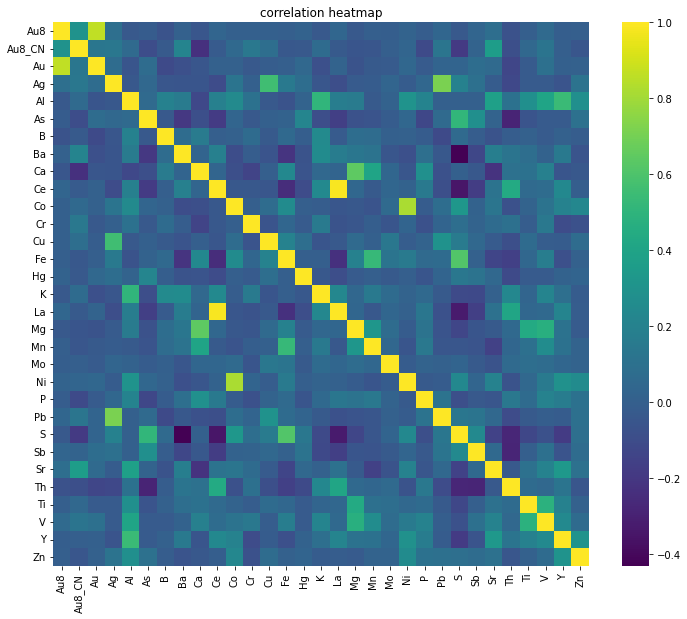

In [5]:
fig1, ax1 = plt.subplots(figsize=(12,10))
#plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix,cmap='viridis')
plt.title('correlation heatmap')
plt.show()


<div style="line-height:200%;font-family:vazir;font-size:medium">
<p style="direction: rtl;text-align: justify;">
اگر با دقت به خروجی بخش دوم نگاه کنید، می‌بینید که این شکل متقارن است. به این دلیل که رابطه ویژگی 
<code>x</code>
 و 
 <code>y</code>
  با رابطه ویژگی 
  <code>y</code>
   و 
   <code>x</code>
    برابر است. یعنی هر مقدار دو بار حساب شده است و ماتریس از روی قطر متقارن است.
</p>
</div>



<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
بخش سوم
</h2>
<div style="line-height:200%;font-family:vazir;font-size:medium">
<p style="direction: rtl;text-align: justify;">
ماسک، آرایه‌ای است که اجزای آن فقط صفر و یک (یا <code>True</code> و <code>False</code>) می‌باشند. در این قسمت می‌خواهیم یک ماسک بسازیم و از آن برای نمایش مثلث پایینی نقشه‌ی حرارتی استفاده کنیم.
<br>

<ul style="direction: rtl;text-align: justify;">
  <li>
با استفاده از نامپای، ماسکی بسازید که مثلث پایینی آن (درایه‌های زیر قطر) مقدار صفر باشد و خانه‌های بالای قطر(و خود قطر)، مقدار یک داشته باشد.
</li>

  <li>
این ماسک باید ۳۱ سطر و ۳۱ ستون داشته باشد.</li>
</ul>

</p>
</div>

In [6]:
import numpy as np
mask = np.zeros((31,31))
mask[np.triu_indices(31)] = 1
my_mask = mask


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
بخش چهارم
</h2>
<div style="line-height:200%;font-family:vazir;font-size:medium">
<p style="direction: rtl;text-align: justify;">
<ul style="direction: rtl;text-align: justify;">
  <li>
با مت‌پلات، یک شکل شامل یک صفحه‌محور بسازید و اندازه‌ی طول و عرض آن را به ترتیب برابر ۱۲ و ۱۰ اینچ قرار دهید.
</li>

  <li>
با استفاده از تابع <code>heatmap</code> سیبورن، بر روی صفحه‌محوری که ساختید، یک نقشه‌ی حرارتی بکشید. ماتریس رابطه‌ای که در بخش اول به‌ دست آمد را به آن بدهید. این‌بار از نگاشت رنگ <code>jet</code> استفاده کنید.

</li>

  <li>
ماسکی که در بخش قبل ساختید را در آرگومان <code>mask</code> به تابع <code>heatmap</code> بدهید تا فقط قسمت پایینی نقشه حرارتی رسم شود. خانه‌هایی که مقدار <code>mask</code> آن‌ها برابر یک می‌باشد، رسم نمی‌شوند.

</li>

  <li>
عنوان نمودار را برابر <code>correlation heatmap lower triangular</code> قرار دهید.
</li>

</ul>
</p>
</div>

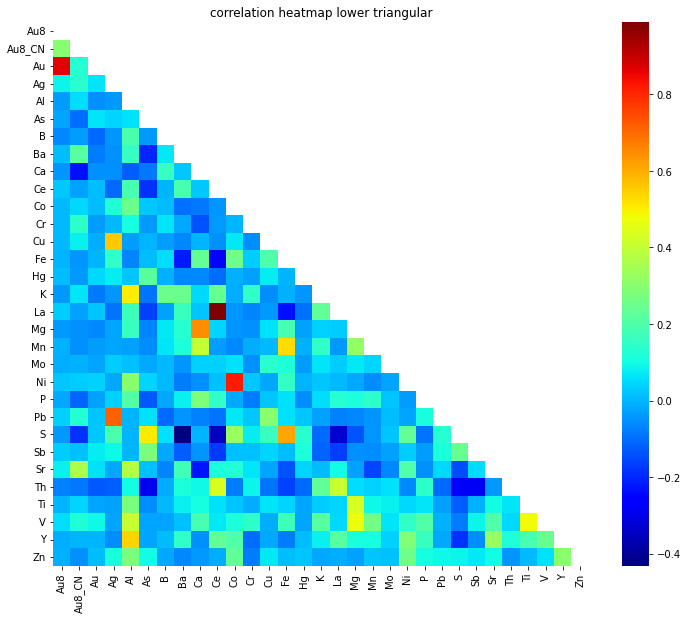

In [7]:
fig2, ax2 = plt.subplots(figsize=(12,10))
sns.heatmap(corr_matrix,cmap="jet",mask=my_mask)
plt.title('correlation heatmap lower triangular')
plt.show()


<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
توابع نگاشت رنگ
</h3>
<div style="line-height:200%;font-family:vazir;font-size:medium">
<p style="direction: rtl;text-align: justify;">
در این تمرین از دو تابع نگاشت رنگ استفاده کردید. انتخاب نگاشت رنگ متناسب با نیاز ما و نوع مسئله مشخص می‌شود. هر تابع نگاشت رنگ، اعداد را به طیف مخصوصی از رنگ‌ها نگاشت می‌کند. این طیف می‌تواند شامل یک، دو یا حتی همه‌ی رنگ‌ها باشد. مت‌پلات توابع نگاشت رنگ متنوعی دارد که در
 <a href="https://matplotlib.org/stable/tutorials/colors/colormaps.html
">این لینک </a>
  می‌توانید با آن‌ها آشنا شوید.
</p>
</div>


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    برای ساخته‌شدن فایل <code>result.zip</code> سلول زیر را اجرا کنید. توجه داشته باشید که پیش از اجرای سلول زیر تغییرات اعمال شده در نت‌بوک را ذخیره کرده باشید (<code>ctrl+s</code>) تا در صورت نیاز به پشتیبانی امکان بررسی کد شما وجود داشته باشد.
</font>
</p>

In [1]:
import zlib
import zipfile
import joblib

joblib.dump(fig2,"fig2")
joblib.dump(fig1,"fig1")
np.savez("answers.npz", corr_matrix = corr_matrix.to_numpy(), my_mask = my_mask)

def compress(file_names):
    print("File Paths:")
    print(file_names)
    # Select the compression mode ZIP_DEFLATED for compression
    # or zipfile.ZIP_STORED to just store the file
    compression = zipfile.ZIP_DEFLATED
    # create the zip file first parameter path/name, second mode
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            # Add file to the zip file
            # first parameter file to zip, second filename in zip
            zf.write('./' + file_name, file_name, compress_type=compression)


file_names = ["fig2","fig1","answers.npz", "unidro.ipynb"]
compress(file_names)

NameError: name 'fig2' is not defined